# **Sistemas de Recomendación**

Los sistemas de recomendación son `algoritmos` que filtran y predicen las preferencias del usuario para sugerirle elementos (productos, películas, noticias, etc.) que probablemente le interesen.

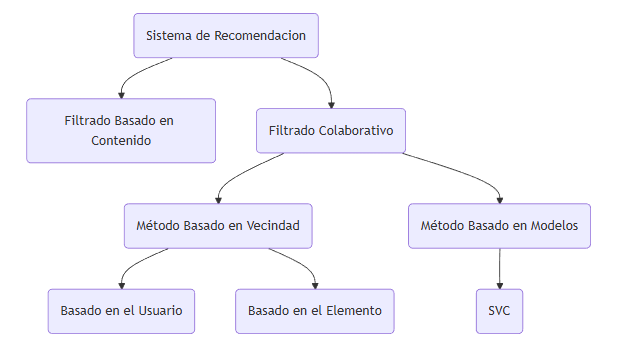

**¿Cómo funciona?** Pueden usar enfoques de filtrado colaborativo *(basado en el comportamiento de usuarios similares)*, filtrado basado en contenido *(basado en atributos del ítem)* o una combinación híbrida para generar sugerencias personalizadas.

**Algoritmos comunes:** Filtrado Colaborativo (basado en usuario/ítem), Factorización Matricial (SVD, ALS), Modelos
basados en Redes Neuronales (Deep Learning), Algoritmos de Reglas de Asociación.


# Filtrado Colaborativo

#### **Método Basado en Vecindad**  
*`K`-`N`earest `N`eighbors (KNN)*

Los métodos basados en vecindad se basan en encontrar vecinos cercanos (usuarios o peliculas) utilizando métricas de similitud como la `similitud del coseno` o el `coeficiente de correlación de Pearson`.

**Basado en usuarios**: Identifica usuarios que tienen gustos similares a los del usuario objetivo y recomienda ítems que a esos usuarios "vecinos" les gustaron, pero que el usuario objetivo aún no ha visto.

**Basado en ítems**: Encuentra ítems similares a los que el usuario ya ha interactuado positivamente y recomienda esos ítems similares.

***Ejemplo***: Si un usuario A y un usuario B han valorado películas de manera similar, y el usuario B ha valorado muy bien una película que el usuario A no ha visto, el sistema podría recomendarle esa película a A. 

**Justificación de la elección del método KNN frente al uso de la librería Surprise**

En el desarrollo del sistema de recomendación de películas basado en **filtrado colaborativo**, se consideró inicialmente el uso de la librería **Surprise**, reconocida por su eficiencia y especialización en algoritmos de recomendación colaborativa (como SVD, NMF y KNN con métricas optimizadas). Sin embargo, durante la fase de implementación, se presentaron **problemas técnicos persistentes al intentar instalar y configurar la librería** en el entorno de desarrollo (por ejemplo, conflictos de dependencias, incompatibilidades con versiones de Python o paquetes como NumPy/SciPy, o limitaciones del entorno —como en ciertos despliegues de Streamlit Cloud o contenedores restringidos).

Ante estas dificultades, y con el objetivo de mantener el avance del proyecto sin comprometer la calidad del enfoque, se optó por implementar un **método basado en KNN utilizando bibliotecas más estándar y ampliamente compatibles**, como scikit-learn. Este enfoque ofrece las siguientes ventajas en el contexto del proyecto:

1. **Mayor control y transparencia**: Al construir el modelo KNN manualmente (usando NearestNeighbors de scikit-learn sobre una matriz de calificaciones o interacciones usuario-ítem), se tiene total visibilidad del proceso: preprocesamiento, cálculo de similitudes (por ejemplo, coseno o distancia euclidiana), y generación de recomendaciones.
2. **Compatibilidad y estabilidad**: scikit-learn es una dependencia común en la mayoría de los entornos de desarrollo en Python, lo que evita problemas de instalación y asegura portabilidad del código.
3. **Suficiencia para el objetivo**: Para un sistema de recomendación basado en filtrado colaborativo user-based o item-based, KNN es un método sólido, intuitivo y efectivo, especialmente cuando el conjunto de datos no es extremadamente grande ni extremadamente disperso.
4. **Facilidad de integración**: Al usar herramientas como pandas y scikit-learn, la integración con interfaces de usuario (por ejemplo, en Streamlit) resulta más directa, sin necesidad de serializar o adaptar modelos de librerías externas.

Por lo tanto, aunque Surprise ofrece implementaciones altamente optimizadas y métricas de evaluación integradas, **la elección de KNN con scikit-learn representa una solución pragmática, robusta y técnicamente válida** que cumple con los objetivos del proyecto sin depender de librerías con problemas de compatibilidad en el entorno de desarrollo.

### Sistemas de Recomendación: Filtrado Colaborativo vs. Filtrado por Contenido
En el desarrollo de sistemas inteligentes de recomendación, existen dos enfoques fundamentales: el filtrado colaborativo y el filtrado basado en contenido. Ambos utilizan la similitud del coseno como métrica central, pero difieren en los datos que emplean y en la lógica detrás de sus recomendaciones.

**1. Filtrado Colaborativo (User-Based, con enfoque KNN)**

- **Metodología:**

Este enfoque se basa en el comportamiento colectivo de los usuarios. Se construye una matriz usuario-película con las calificaciones (ratings). Luego, se calcula la similitud del coseno entre pares de usuarios para identificar a los más parecidos (vecinos más cercanos – K-Nearest Neighbors o KNN).
Las recomendaciones se generan identificando películas que usuarios similares han calificado positivamente, pero que el usuario objetivo aún no ha visto.
¿Por qué usarlo?
No requiere conocimiento explícito del contenido de los ítems (como géneros o descripciones). Funciona bien cuando hay suficientes interacciones (ratings) y captura patrones emergentes: "usuarios que pensaron como tú, también les gustó esto".

- **Ventajas:**

Descubre ítems no obvios o fuera del perfil explícito del usuario.
Altamente personalizado si hay suficientes datos de interacción.
Escalable con técnicas de vecindad (KNN).
- **Limitación:**
Sufre del problema del arranque en frío (cold start) para nuevos usuarios sin historial de calificaciones.

**2. Filtrado Basado en Contenido**

- **Metodología:**

Este enfoque analiza las características intrínsecas de los ítems. En este caso, se utilizan los géneros de las películas como descriptores. Cada película se representa como un vector binario en un espacio de dimensiones igual al número de géneros (uno si tiene el género, cero si no).
Dado un género objetivo (ej. "aventura"), se crea un vector de consulta y se compara con todas las películas mediante similitud del coseno. Las películas más similares (es decir, las que pertenecen a ese género) se ordenan además por rating promedio y número de votos para priorizar las más populares y mejor valoradas.
¿Por qué usarlo?
Es ideal cuando se conoce bien el contenido de los ítems y se desea recomendaciones coherentes con los intereses explícitos del usuario (ej. "quiero ver películas de comedia").

- **Ventajas:**

No depende de otros usuarios → funciona incluso con un solo usuario.
Transparente e interpretable: se sabe por qué se recomienda algo.
No sufre del cold start para nuevos ítems, siempre que tengan metadatos.

- **Limitación:**

Tiende a ser menos sorprendente (menos serendipia), ya que solo recomienda ítems similares al perfil conocido.
Conclusión

**Ambos enfoques son complementarios:**

El filtrado colaborativo descubre lo que otros como tú disfrutan.
El filtrado por contenido respeta lo que tú has dicho que te gusta.
En tu implementación, ambos usan KNN implícito (vecindad definida por similitud del coseno) y priorizan ítems con mayor respaldo de la comunidad (rating promedio y conteo), lo que mejora la calidad percibida de las recomendaciones.

Esta combinación permite construir un sistema híbrido robusto, capaz de adaptarse a distintos escenarios de uso y perfiles de usuarios.